In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

# root directory of the project
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from evaluator.model_evaluator import ModelEvaluator



In [2]:
# Load the datasets
X_train = pd.read_csv('../dataset/X_train.csv').values
X_test = pd.read_csv('../dataset/X_test.csv').values
y_train = pd.read_csv('../dataset/y_train.csv').values.ravel()
y_test = pd.read_csv('../dataset/y_test.csv').values.ravel()


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after SMOTE:", dict(zip(unique, counts)))


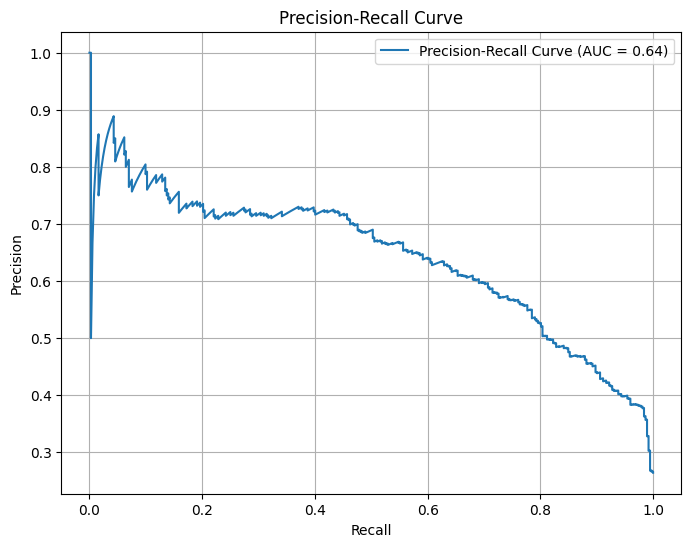

Best Threshold: 0.35
Precision at Best Threshold: 0.57
Recall at Best Threshold: 0.76
F1 Score at Best Threshold: 0.65


In [ ]:
from models.logistic_regression import LogisticRegression

# Initialize and train the model
lr = LogisticRegression(lr=0.01, n_iters=1000, lambda_reg=0.1)
lr.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_probs = lr.predict_proba(X_test)

# Plot the Precision-Recall Curve and find the best threshold
lr.plot_precision_recall_curve(y_test, y_probs)

In [ ]:
from models.logistic_regression import LogisticRegression
lr = LogisticRegression(lr=0.01, n_iters=1000, lambda_reg=0.1)
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_test)
metrics = ModelEvaluator.calculate_metrics(y_test, y_pred)
print(metrics)

{'accuracy': np.float64(0.7407670454545454), 'precision': np.float64(0.5058236272878536), 'recall': np.float64(0.8172043010752689), 'f1_score': np.float64(0.6248715313463514), 'f2_score': np.float64(0.7276208712302537)}


In [5]:
from models.logistic_regression import LogisticRegression
lr = LogisticRegression(eta=0.01, epochs=1000, lambda_reg=0.1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
metrics = ModelEvaluator.calculate_metrics(y_test, y_pred)
print(metrics)

{'accuracy': np.float64(0.8068181818181818), 'precision': np.float64(0.7049180327868853), 'recall': np.float64(0.46236559139784944), 'f1_score': np.float64(0.5584415584415585), 'f2_score': np.float64(0.4965357967667437)}
